In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib as plt
import folium
import branca
import json
import os

In [2]:
county_data = os.path.join('data', "maps", 'us_county_data.csv')
county_geo = os.path.join('data', "maps", 'us_counties_20m_topo.json')

df = pd.read_csv(county_data, na_values=[' '])


#colorscale = branca.colormap.linear.YlOrRd.scale(0, 50e2)
employed_series = df.set_index('FIPS_Code')['Employed_2011']

In [74]:
#series is a pandas series with fips code index and values for map coloring
def county_map(series, map_tiles='cartodbpositron', colorscale=branca.colormap.linear.YlOrRd.scale(0, 50e2)):
    def style_function(feature):
        map_series = series.get(int(feature['id'][-5:]), None)
        
        series_max = series[series < float("Inf")].max()
        series_min = series.min()
            print(series_min)
    print(series_max)
        return {
            'fillOpacity': 0.5,
            'weight': 0,
            'fillColor': '#ffffff' if map_series is None else branca.colormap.linear.YlOrRd.scale(series_min, series_max)(map_series)
        }

    m = folium.Map(
    location=[48, -102],
    tiles=map_tiles,
    zoom_start=3
    )

    folium.TopoJson(
        open(county_geo),
        'objects.us_counties_20m',
        style_function=style_function
    ).add_to(m)

    return m

In [4]:
df = pd.read_csv(county_data, na_values=[' '])
employed_series = df.set_index('FIPS_Code')['Employed_2011']



In [72]:
county_map(employed_series)

In [10]:
businesses = pd.read_csv("data/interim/establishments.csv", encoding='latin-1')

In [11]:
businesses.head()

geo_id  year  Accommodation and food services  \
0    1001  2005                               78   
1    1001  2006                               82   
2    1001  2007                               91   
3    1001  2008                               85   
4    1001  2009                               89   

   Administrative and support and waste management and remediation services  \
0                                                 33                          
1                                                 31                          
2                                                 31                          
3                                                 30                          
4                                                 31                          

   Agriculture, forestry, fishing and hunting  \
0                                          10   
1                                           9   
2                                          10   
3                                           9   
4                                           7   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    9           119                     4   
1                                    8           118                     5   
2                                   11           121                     7   
3                                    9           111                     7   
4                                   11            96                     4   

   Finance and insurance  Health care and social assistance       ...         \
0                     49                                 80       ...          
1                     51                                 86       ...          
2                     62                                 86       ...          
3                     70                                 88       ...          
4                     65                                 88       ...          

   Manufacturing  Mining, quarrying, and oil and gas extraction   \
0             33                                               4   
1             30                                               4   
2             33                                               4   
3             30                                               0   
4             31                                               0   

   Mining, quarrying, and oil and gas extraction, quarrying, and oil and gas extraction  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  4                                      
4                                                  5                                      

   Other services (except public administration)  \
0                                            109   
1                                            105   
2                                            114   
3                                            114   
4                                            114   

   Professional, scientific, and technical services  \
0                                                63   
1                                                66   
2                                                61   
3                                                63   
4                                                60   

   Real estate and rental and leasing  Retail trade  \
0                                  35           176   
1                                  34           180   
2                                  30           176   
3                                  38           176   
4                                  37           175   

   Transportation and warehousing  Util

In [12]:
biz = pd.read_csv("data/interim/establishments.csv", encoding="latin-1")

In [13]:
biz05 = biz[biz["year"] == 2005].drop("year", 1).set_index("geo_id")

In [14]:
biz05["sum"] = biz05.sum(axis=1)

In [15]:
biz15 = biz[biz["year"] == 2015].drop("year", 1).set_index("geo_id")
biz15["sum"] = biz15.sum(axis=1)

In [75]:
county_map(biz05["sum"])

NameError: name 'series_min' is not defined

In [17]:
biz05.loc[48101]

Accommodation and food services                                                          5
Administrative and support and waste management and remediation services                 0
Agriculture, forestry, fishing and hunting                                               2
Arts, entertainment, and recreation                                                      1
Construction                                                                             5
Educational services                                                                     0
Finance and insurance                                                                    4
Health care and social assistance                                                        6
Industries not classified                                                                0
Information                                                                              3
Management of companies and enterprises                                                  0

In [18]:
county_map(biz15["sum"])

In [19]:
biz_compound = ((biz15["sum"] / biz05["sum"]) ** (1/10) - 1) * 100

In [20]:
county_map(biz_compound, colorscale=branca.colormap.linear.RdYlGn.scale(-3, 3))

In [21]:
branca.colormap.linear.YlOrRd.scale(-6 , 0)

In [23]:
?branca.colormap.linear.YlOrRd.scale()()

In [24]:
biz_compound[biz_compound > 0]

geo_id
1003     1.027036
1031     0.031141
1051     0.533933
1071     0.035280
1081     1.581510
1083     0.778103
1089     0.677177
1115     0.946614
1117     0.908675
2013     2.392049
2020     0.341849
2050     1.256764
2060     0.134320
2068     0.828624
2090     0.164140
2100     1.854192
2110     0.373742
2122     0.742705
2130     0.669717
2150     0.251902
2170     1.766474
2180     0.057323
2185     2.509328
2188     2.087635
2195     0.704513
2198     0.496027
2230     0.354647
2240     0.054511
2261     1.688227
2270     2.504941
           ...   
53071    0.148371
53073    0.451572
54061    1.142156
54079    0.657988
54091    0.399964
55015    0.511262
55017    0.639277
55025    0.412746
55035    0.429233
55045    0.063512
55063    0.003299
55065    0.334852
55078    3.576449
55081    0.199891
55087    0.003991
55091    0.412807
55097    0.073738
55109    0.561681
56003    0.356082
56005    1.354718
56009    0.631406
56011    0.401749
56019    1.517422
56021    2.289969
560

In [25]:
county_map(biz15["sum"])

In [26]:
county_map(biz05["sum"])

In [27]:
biz_compound.plot(kind="box")

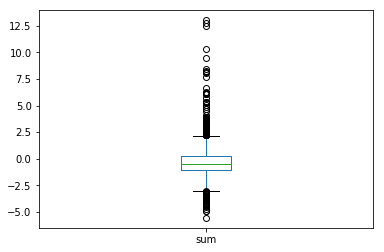

In [28]:
plt.pyplot.show()

In [30]:
12 < float('Inf')

True

In [40]:
int(float('NaN') or 0)

ValueError: cannot convert float NaN to integer

In [50]:
employed_series

FIPS_Code
0        140674478.0
1000       1993977.0
1001         23854.0
1003         78491.0
1005          8651.0
1007          8303.0
1009         24156.0
1011          3186.0
1013          8231.0
1015         48846.0
1017         13148.0
1019         10676.0
1021         18206.0
1023          4557.0
1025          8592.0
1027          4673.0
1029          5917.0
1031         20324.0
1033         22940.0
1035          3949.0
1037          4100.0
1039         15317.0
1041          6227.0
1043         35435.0
1045         19063.0
1047         12848.0
1049         25954.0
1051         32803.0
1053         13390.0
1055         41662.0
            ...     
72095         2649.0
72097        22989.0
72099        12097.0
72101         7303.0
72103         6473.0
72105         7120.0
72107         4033.0
72109         4378.0
72111         6564.0
72113        51923.0
72115         6591.0
72117         4537.0
72119        14204.0
72121         7029.0
72123         6523.0
72125        10045.0
721

Object `Int` not found.
